In [1]:
import pandas as pd
from scipy.stats import gaussian_kde
import numpy as np
import matplotlib.pyplot as plt
import itertools as it
# from matplotlib.patches import Rectangle
# %matplotlib inline

pd.options.display.max_rows = 20
# pd.options.display.max_columns = 999
plt.rcParams.update({'font.size':20})

In [2]:
BTR = pd.read_csv("bbm-true-prototype.csv")
BTR.columns = ["name", "n", "sdsize", "sddepth", "att", "maa", "mintrap"]
BTR.sort_values(by=["name"])

,name,n,sdsize,sddepth,att,maa,mintrap
0,001.bnet,321,1,0.0,1.0,0.0,1
1,002.bnet,139,10656,NaN,24.0,0.0,24
2,003.bnet,20,1,0.0,1.0,0.0,1
3,004.bnet,247,17620,NaN,352.0,0.0,352
4,005.bnet,28,7,4.0,1.0,0.0,1
...,...,...,...,...,...,...,...
205,208.bnet,15,14,4.0,5.0,0.0,5
206,209.bnet,87,2,1.0,1.0,0.0,1
207,210.bnet,144,2,1.0,NaN,NaN,1
208,211.bnet,183,3,2.0,NaN,NaN,1


In [3]:
BID = pd.read_csv("bbm-identity-prototype.csv")
BID.columns = ["name", "n", "sdsize", "sddepth", "att", "maa", "mintrap"]
BID.sort_values(by=["name"])

,name,n,sdsize,sddepth,att,maa,mintrap
0,003.bnet,20,5,2,NaN,NaN,NaN
1,005.bnet,28,7,4,NaN,NaN,NaN
2,007.bnet,5,3,1,NaN,NaN,NaN
3,008.bnet,28,53,4,NaN,NaN,NaN
4,010.bnet,15,9,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...
106,205.bnet,45,25,2,NaN,NaN,NaN
107,208.bnet,15,14,4,NaN,NaN,NaN
108,210.bnet,144,2,1,NaN,NaN,NaN
109,211.bnet,183,3,2,NaN,NaN,NaN


In [4]:
RAN = pd.read_csv("random-prototype.csv")
RAN.columns = ["name", "n", "sdsize", "sddepth", "att", "maa", "mintrap"]
RAN.sort_values(by=["name"])

,name,n,sdsize,sddepth,att,maa,mintrap
0,01.bnet,100.0,2,1.0,NaN,NaN,1.0
1,02.bnet,100.0,9,3.0,NaN,NaN,5.0
2,03.bnet,100.0,2,1.0,NaN,NaN,1.0
3,04.bnet,100.0,1,0.0,NaN,NaN,1.0
4,05.bnet,100.0,6,3.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...
55,56.bnet,300.0,10,4.0,NaN,NaN,3.0
56,57.bnet,300.0,2,1.0,NaN,NaN,1.0
57,58.bnet,NaN,42,NaN,NaN,NaN,8.0
58,59.bnet,300.0,1,0.0,NaN,NaN,1.0


In [5]:
class PlotVar:
    _label_dict = {
        "n": r"network size",
        "sdsize": r"SD size",
        "sddepth": r"SD depth",
        "att": r"number of attractors",
        "maa": r"number of motif avoidant attractors",
        "mintrap": r"number of minimal trapspaces",
    }

    def __init__(self, name: str, minval: float, maxval: float, log:bool=False):
        self.name = name
        self.minval = minval
        self.maxval = maxval
        self.label = self._label_dict[name]
        self.log = log

In [6]:
def comparison_plots(data, vars, hlines=None, vlines=None):
    icount = len(vars)
    jcount = len(vars[0])

    fig = plt.figure(figsize=(10 * jcount, 10 * icount))
    fig.set_facecolor("white")

    figs = fig.subfigures(icount, jcount)
    figs = np.reshape(
        figs, (icount, jcount)
    )  # always treat as 2d array, even when only 1 col or row

    for i, j in it.product(range(icount), range(jcount)):
        px, py = vars[i][j]
        vx, vy = px.name, py.name
        xmin, xmax = px.minval, px.maxval  # lims[i][j][0]
        ymin, ymax = py.minval, py.maxval  # lims[i][j][1]
        xlog, ylog = px.log, py.log
    
        axd = figs[i, j].subplots(1,1)
        axd.set_zorder(10)

        if hlines:
            axd.hlines(hlines, xmin, xmax, color="k", linestyle="-.")
        if vlines:
            axd.vlines(vlines, ymin, ymax, color="k", linestyle="-.")
        if xlog:
            axd.set_xscale('log')
        if ylog:
            axd.set_yscale('log')

        axd.scatter(data[vx], data[vy],
            linewidths=2,
            edgecolor="k",
            zorder=10,
            clip_on=False,
        )
        
        axd.set_xlabel(px.label)
        axd.set_ylabel(py.label)
        axd.set_xlim(xmin, xmax)
        axd.set_ylim(ymin, ymax)

        figs[i, j].subplots_adjust(hspace=0.0135, wspace=0.0135)
    fig.subplots_adjust(bottom=0.08, left=0.05)
    return fig

C:\Users\danie\AppData\Local\Temp\ipykernel_14848\102273066.py:42: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axd.set_ylim(ymin, ymax)


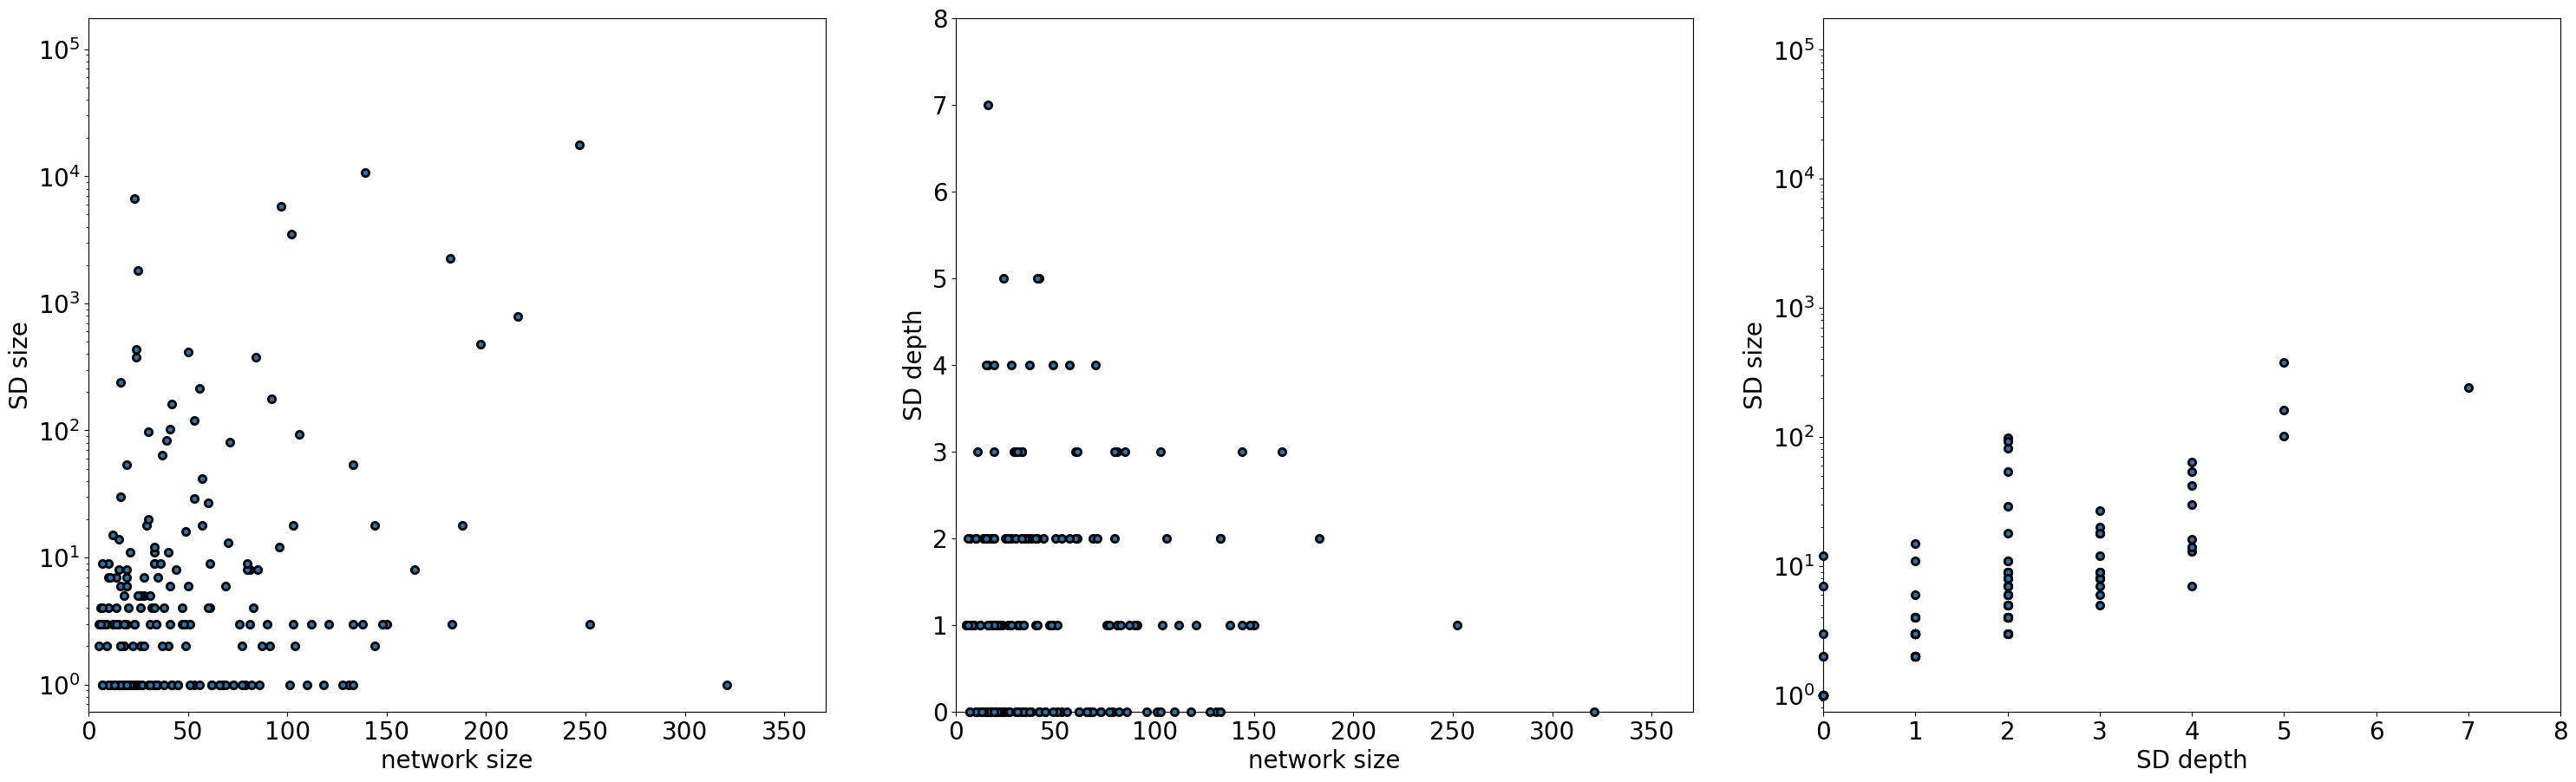

In [9]:
vars = [
    [
        (
            PlotVar("n",0,BTR["n"].max()+50),
            PlotVar("sdsize",0,BTR["sdsize"].max()*10,True),
        ),
        (
            PlotVar("n",0,BTR["n"].max()+50),
            PlotVar("sddepth",0,BTR["sddepth"].max()+1),
        ),
        (
            PlotVar("sddepth",0,BTR["sddepth"].max()+1),
            PlotVar("sdsize",0,BTR["sdsize"].max()*10,True),
        ),
    ],
]

fig = comparison_plots(BTR, vars)

C:\Users\danie\AppData\Local\Temp\ipykernel_14848\102273066.py:42: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axd.set_ylim(ymin, ymax)


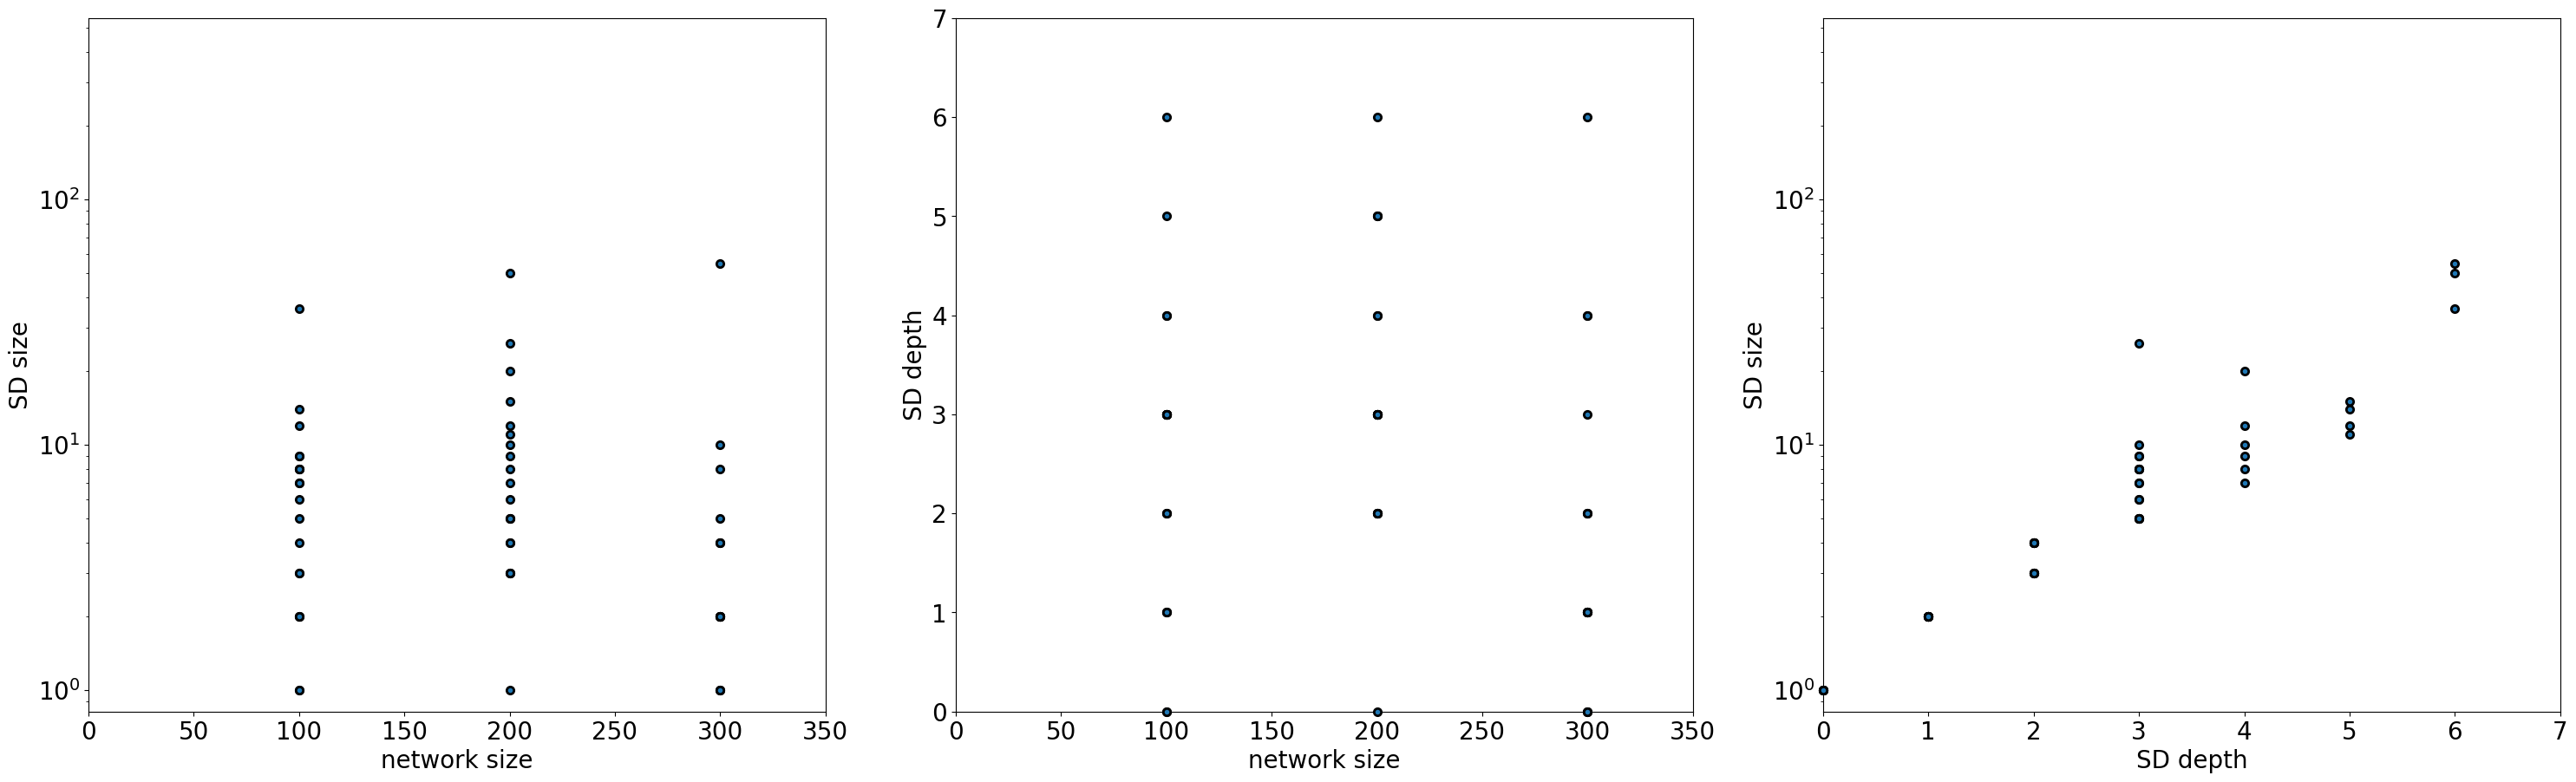

In [10]:
vars = [
    [
        (
            PlotVar("n",0,RAN["n"].max()+50),
            PlotVar("sdsize",0,RAN["sdsize"].max()*10,True),
        ),
        (
            PlotVar("n",0,RAN["n"].max()+50),
            PlotVar("sddepth",0,RAN["sddepth"].max()+1),
        ),
        (
            PlotVar("sddepth",0,RAN["sddepth"].max()+1),
            PlotVar("sdsize",0,RAN["sdsize"].max()*10,True),
        ),
    ],
]

fig = comparison_plots(RAN, vars)